# Disclaimer

In order to improve the readibility of the portfolio, ChatGPT was used to assist in rephasing the texts. The ideas, observations, and experiments are original, only word expressions were modified in some cases. 

---
# Task 1 - Story

In 2016, a collaborative effort between data scientists and medical professionals has emerged to tackle the escalating challenge of diabetes. A health research centre in the United States embarked on a mission to develop a machine learning solution for early diabetes detection. The team believed that by predicting diabetes risk in its early stages, they could assist healthcare providers in intervening proactively, in order to providing personalized care plans and lifestyle recommendations to affected individuals. 

To achieve this, they collected a rich dataset comprising crucial health indicators from residents in all states, ensuring anonymity while providing a comprehensive foundation for their predictive model.

In the model evaluation, prioritizing the recall score over accuracy was a strategic decision grounded in the nature of the diabetes detection task. Recall holds paramount importance in scenarios where the consequences of missing positive instances (diabetes cases) are more severe than misclassifying negative instances. In the context of healthcare, particularly diabetes detection, false negatives (missing actual diabetes cases) can have critical implications, potentially leading to delayed treatment or intervention.

---
# Task 2 - The Data

The dataset, gathered in 2015, originated from an extensive phone call questionnaire conducted across all 50 states, the District of Columbia, Guam, and Puerto Rico. The data was collected by Centers for Disease Control and Prevention (CDC) that respondents were asked series of demographic and personal health questions. While initially comprehensive, covering a broad range of information, it underwent meticulous curation to extract only the data relevant to this research on diabetes detection.


Original source:  
https://www.cdc.gov/brfss/annual_data/annual_2015.html  

Data used in this Notebook:  
https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset/data 

Data Extraction and Cleaning Notebook:  
https://www.kaggle.com/code/alexteboul/diabetes-health-indicators-dataset-notebook/notebook

The extraction and first stage of cleaning was conducted by a kaggle user, "Alex Teboul":  
https://www.kaggle.com/alexteboul

<h4>Independent Variables:</h4>

Target Feature

0. Diabetes_012: No=0, Pre-diabetes or borderline diabetes=1, Diabetes=2


Other Features : Question asked --> Answers

1. HighBP: Adults who have been told they have high blood pressure by a doctor, nurse, or other health professional --> Yes=1, No=0

2. HighChol: Have you EVER been told by a doctor, nurse or other health professional that your blood cholesterol is high? --> Yes=1, No=0

3. CholCheck: Cholesterol check within past five years --> Yes=1, No=0

4. BMI: Body Mass Index (BMI) --> BMI value

5. Smoker: Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] --> Yes=1, No=0
 
6. Stroke: (Ever told) you had a stroke. --> Yes=1, No=0  

7. HeartDiseaseorAttack: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI) --> Yes=1, No=0

8. PhyActiviity: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job --> Yes=1, No=0

9. Fruits: Consume Fruit 1 or more times per day --> Yes=1, No=0

10. Veggies: Consume Vegetables 1 or more times per day --> Yes=1, No=0

11. HvyAlcoholConsump: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) --> Yes=1, No=0

12. AnyHealthcare: Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service? --> Yes=1, No=0

13. NoDocbcCost: Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? --> Yes=1, No=0 

14. GenHlth: Would you say that in general your health is: --> Ordinal feature: 1=Excellent - 5=Poor

15. MentHlth: Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? --> Ordinal=number of days  

16. PhysHlth: Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? --> Ordinal=number of days  

17. DiffWalk: Do you have serious difficulty walking or climbing stairs? --> Yes=1, No=0
  
18. Sex: Indicate sex of respondent. --> Female=0, Male=1

19. Age: Age category --> Ordinal: age 18-24=1, all the way up to 13, which is 80 and older. 5 year increments.

20. Education: What is the highest grade or year of school you completed? --> Ordinal: 1 being never attended school or kindergarten only up to 6 being college 4 years or more

21. Income: Is your annual household income from all sources: (If respondent refuses at any income level, code "Refused.") --> Ordinal: 1 being less than $10,000 all the way up to 8 being $75,000 or more

In [1]:
# prepare packages
import numpy as np
import pandas as pd
pd.options.display.max_columns = None
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, StratifiedKFold, RepeatedStratifiedKFold, cross_validate

from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, f1_score, recall_score, classification_report

In [2]:
# Import and quick check on Dataset
df = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")
df.head(5)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


---
# Task 3 - IDA

There are over 250 thousands instances and 22 columns of features.

The dataset is clean with 0 missing value.

All the features are numeric and data types are float.

In [3]:
# Check for data quality
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [4]:
# for cleaniness in further plots, all float types are converted to int
df = df.astype(int)

There are 3 classes in diabetes_012, which is the target column.  
The distribution is clearly imbalance with class 0 (No Diabetes) domination among 3 classes.

<Axes: xlabel='Diabetes_012', ylabel='count'>

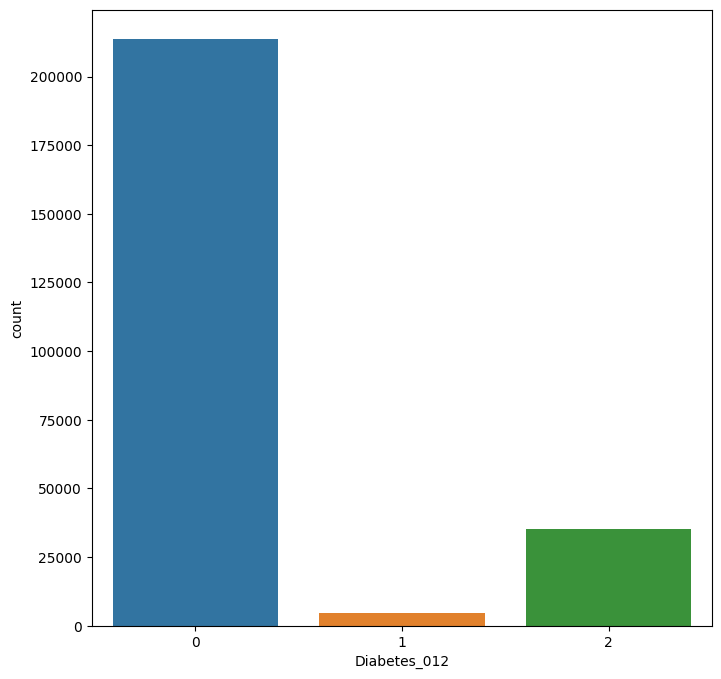

In [5]:
# plot classes
fig, ax = plt.subplots(figsize=(8, 8))
sns.countplot(data=df, x='Diabetes_012')

<h4>Observations:</h4>

The following plots show that the majority of the respondents are in middle age, high education, and high income group.

Age groups, 8, 9 and 10 have respondents over 30000 each. Over 100000, which is around 40% of the respondents, were being college for 4 year or more. Around 30% of them are in the highest income group. 

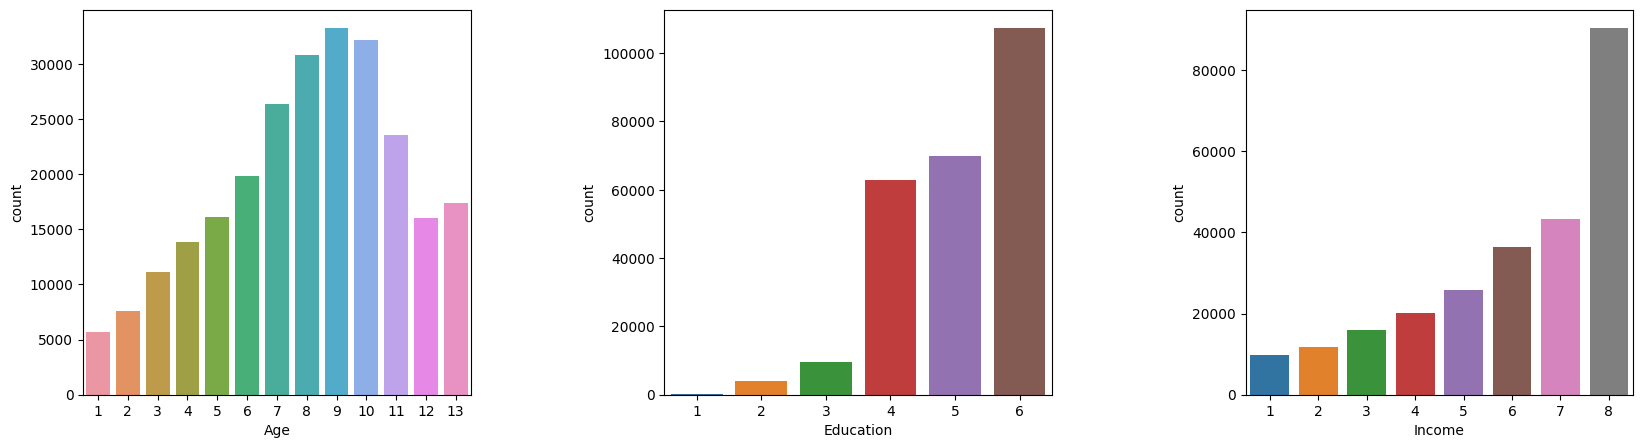

In [48]:
# prepare list for some of the demographic features
li_demo = ['Age', 'Education', 'Income']

# prepare subplot format
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
axe = ax.ravel()

# use for loop to plot
for i in range(len(li_demo)):

    # create bar charts for each column
    sns.countplot(x=df[li_demo[i]], ax=axe[i])

# adjust the spacing of the subplots
plt.subplots_adjust(
    wspace=0.5, 
    hspace=0.5
)

<h4>Observations:</h4>

High blood pressure (HighBP), high blood cholesterol (HighChol), Smoker, and Sex are relatively evenly distributed. Higher amount of respondents have never been told by professional to have high blood pressure nor high blood cholesterol. Respondents are mostly smoker and mostly female. But none of these groups have any dominant classes. 

Cholesterol check (CholCheck), Stroke, HeartDiseaseorAttack, heavy drinker (HvyAlcoholConsump), AnyHealthcare, NoDoctorCost, and DiffWalk are features having clear imbalanced results. Except CholCheck and AnyHealthcare, which have dominated positive answer, the rest are having negative dominated answer. 

More positive answers were given in PhyActivity, Fruits, and Veggies that implied more respondents had exercises and consumed fruits and vegetables in frequency that regarded as favourble to reduce health problem. 

General health description by the respondents (GenHlth) indicated that they described their health in better scores, for which 1 is excellent and 5 is poor. Group 1, 2, and 3 were the majority groups.

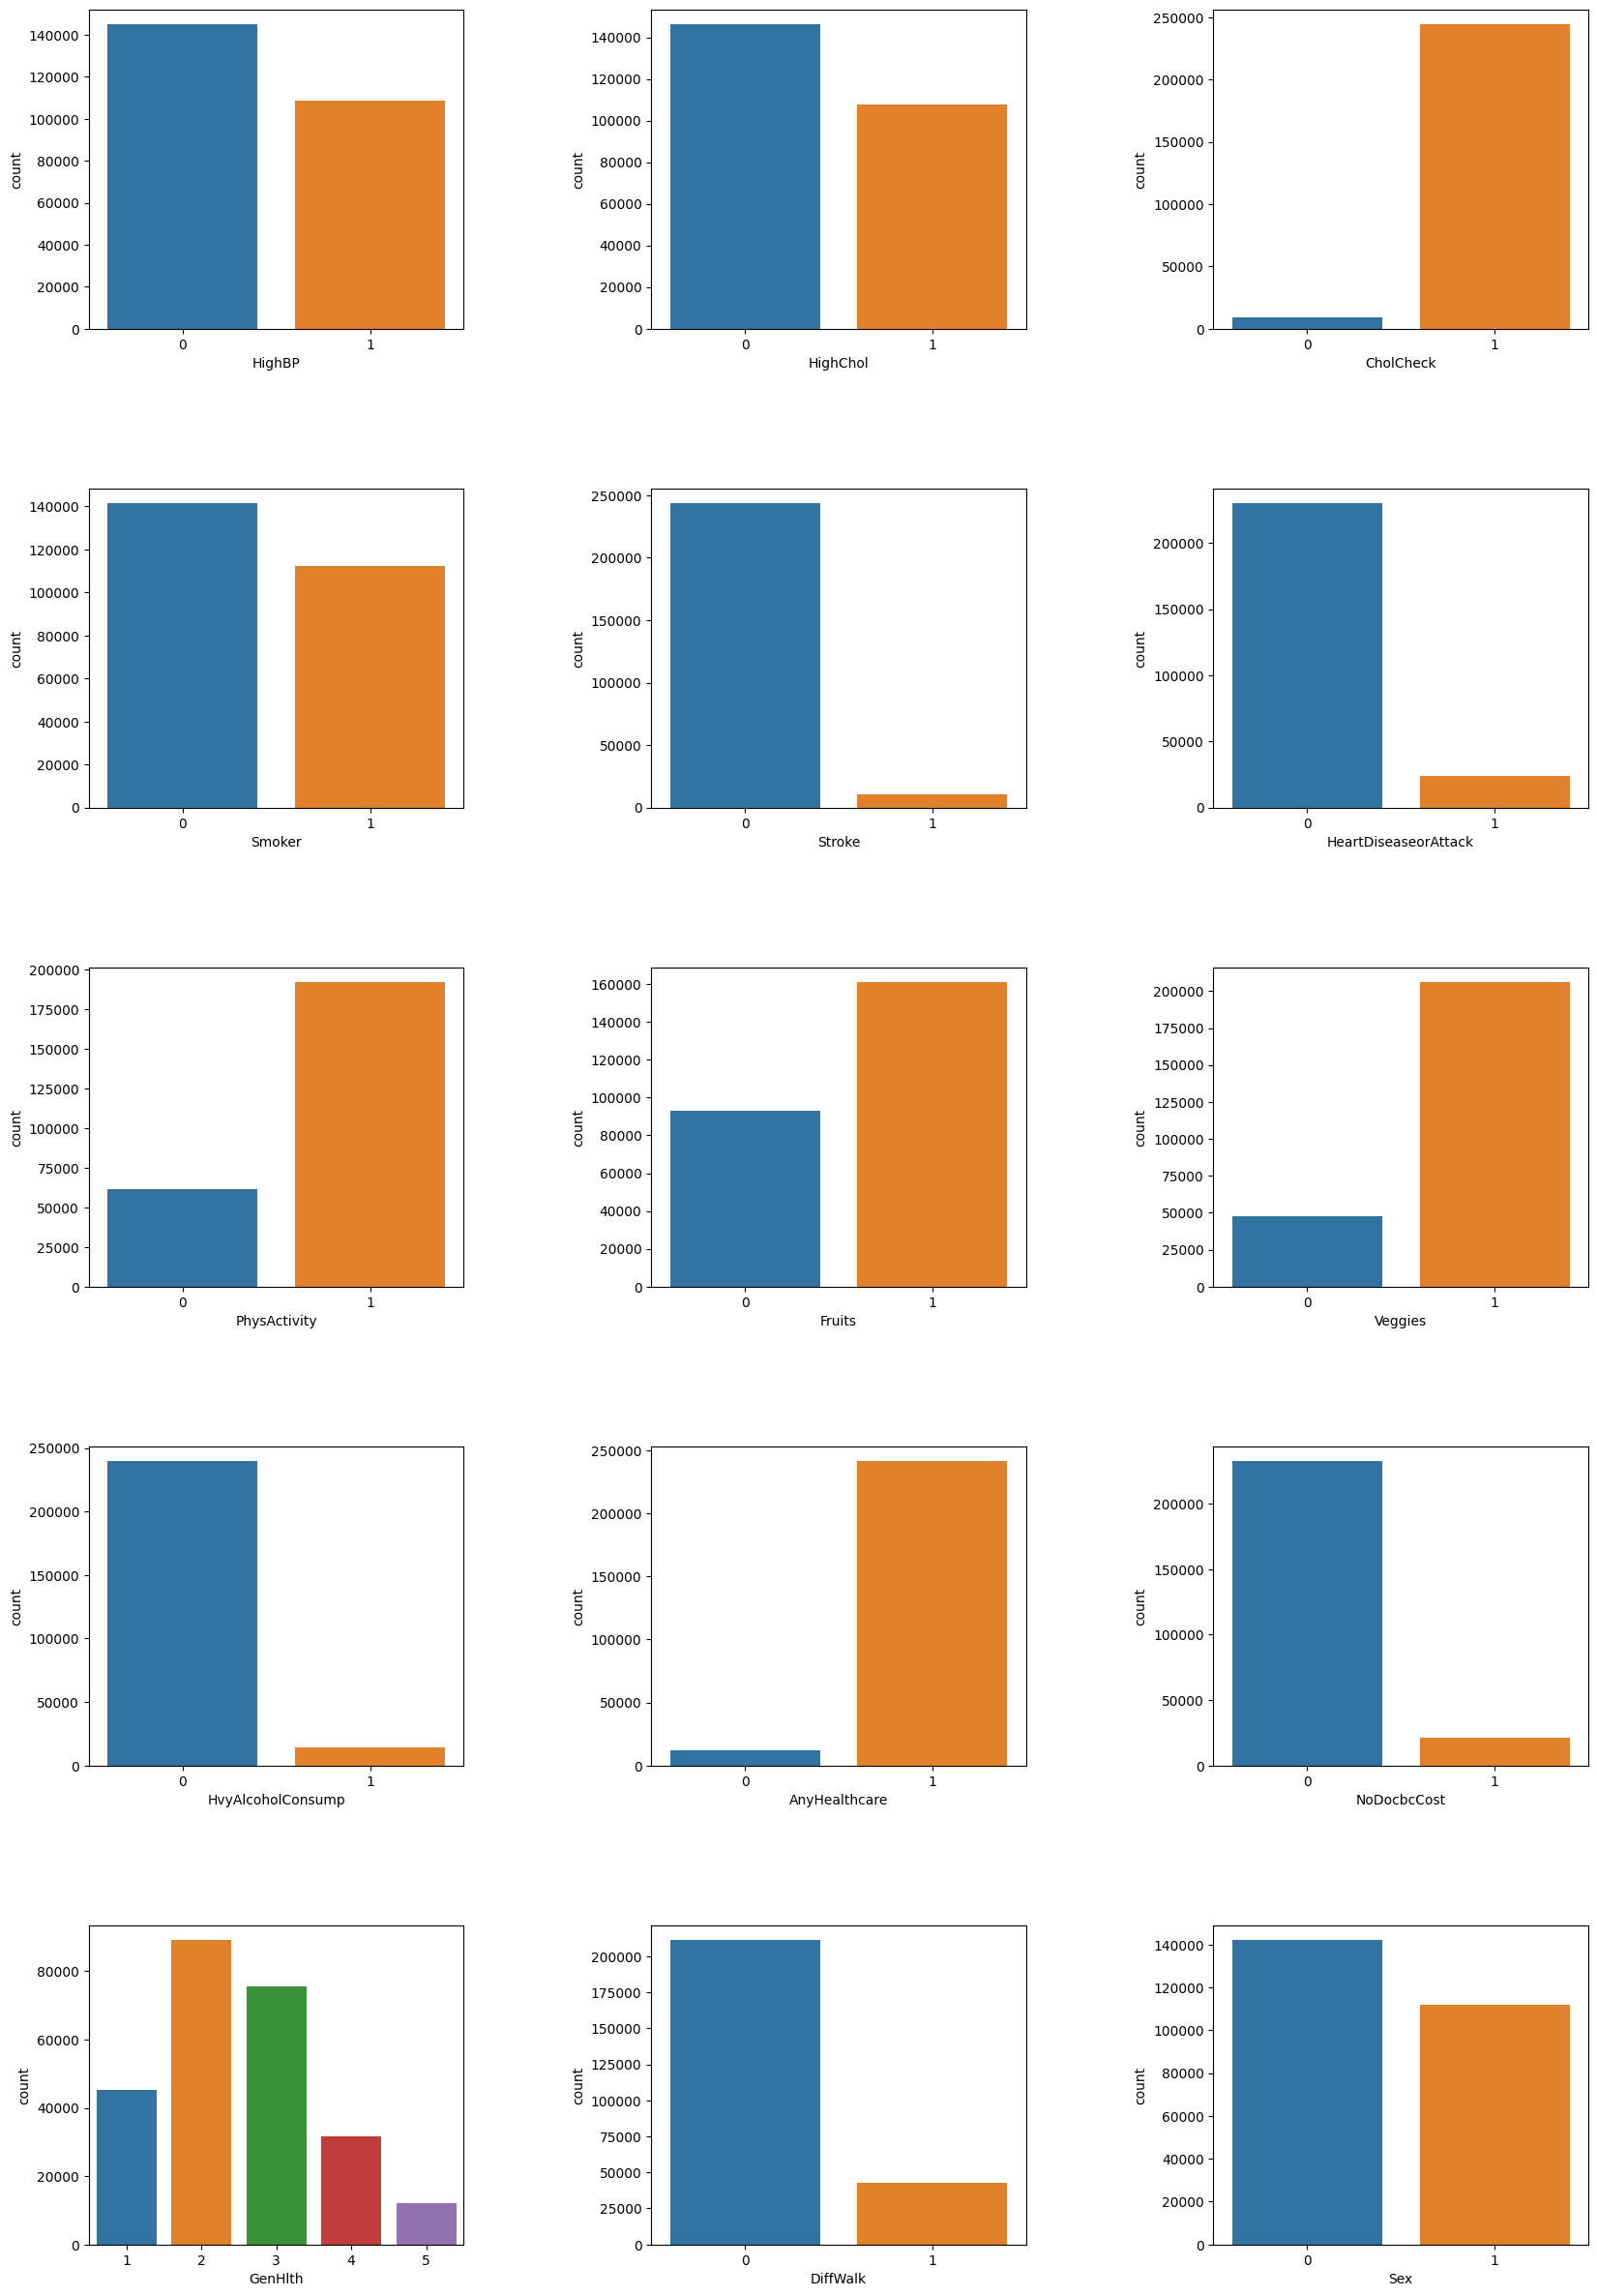

In [47]:
# Concerning about the readibility of the subplot figures
# "BMI", "MentHlth", and "PhysHlth" will be analysed in further section instead.

# define the size and dimensions of subplots
fig, ax = plt.subplots(5, 3, figsize=(20, 30))
axe = ax.ravel()

# plot columns using for loop
i = 0
for col in df.columns:

    # include only the features discussed in this section
    if col not in ["Diabetes_012", "Age", "Education", "Income", "BMI", "MentHlth", "PhysHlth"]:
        sns.countplot(x=df[col], ax=axe[i])
        i += 1

# control the spacing
plt.subplots_adjust(
    wspace=0.5, 
    hspace=0.5
)

<h4>Observations:</h4>

The BMI of the dataset is right-skewed. Most of the values are between 20 to 30, with extreme maximum value 98.

<Axes: xlabel='BMI', ylabel='Count'>

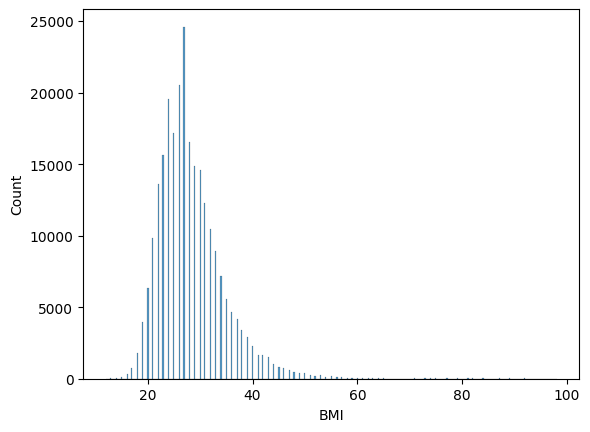

In [7]:
sns.histplot(x=df['BMI'])

In [8]:
df['BMI'].describe()

count    253680.000000
mean         28.382364
std           6.608694
min          12.000000
25%          24.000000
50%          27.000000
75%          31.000000
max          98.000000
Name: BMI, dtype: float64

<h4>Observations:</h4>

Most of the respondents (over 175 thousands) do not have any bad mental health day.  
Some of the others experienced 2 days and 30 days having bad mental health,  
followed by 1 day, 3 days, and 10 days. But none of these happened to over 20000 respondents.

<Axes: xlabel='MentHlth', ylabel='count'>

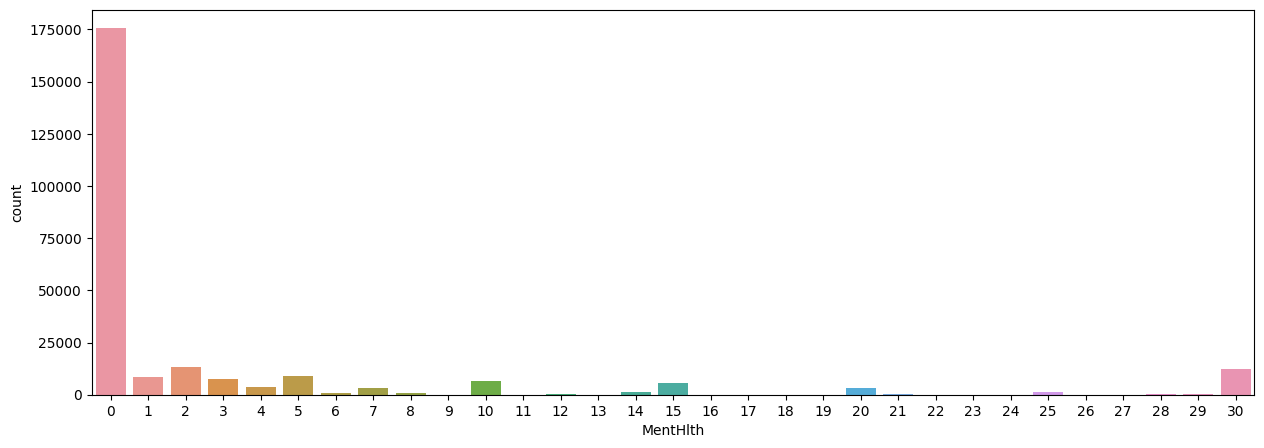

In [9]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(data=df, x='MentHlth', ax=ax)

In [10]:
df['MentHlth'].describe()

count    253680.000000
mean          3.184772
std           7.412847
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          30.000000
Name: MentHlth, dtype: float64

<h4>Observations:</h4>

Around 160 thousand respondents do not have physical health problem in the past 30 days.  
Slightly around 20 thousand of respondents have that problem in 2 days and 30 days each.

<Axes: xlabel='PhysHlth', ylabel='count'>

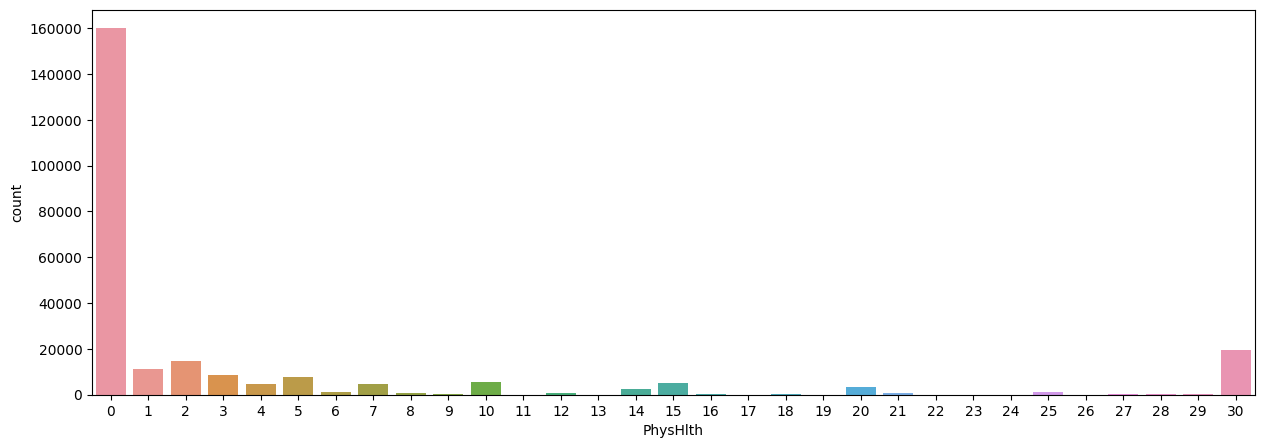

In [11]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(data=df, x='PhysHlth', ax=ax)

In [12]:
df['PhysHlth'].describe()

count    253680.000000
mean          4.242081
std           8.717951
min           0.000000
25%           0.000000
50%           0.000000
75%           3.000000
max          30.000000
Name: PhysHlth, dtype: float64

---
# Task 4 - EDA, Preprocessing
---

<h4>Binary Classes and Balanced Classes</h4>

1. Diabetes class 2 is grouped to class 1  
Updated Classes are: 0 = NO Diabetes and 1 = Prediabetes + Diabetes

2. Downsampling  
Imbalanced classes are solved by downsampling on class 0  
Number of Class 0 value (39977) is randomly selected to match the same number of Class 1 value.

3. Define target and features

---
<h4>Class 2 -> Class 1</h4>

In [13]:
# Retrieve indexes of all class 2 instances
# Convert all class 2 value to class 1
# Check the class distribution -> should be no more "class 2"

diabetes_02_index = df[df['Diabetes_012']==2].index
df.loc[diabetes_02_index, ['Diabetes_012']] = 1
df['Diabetes_012'].value_counts()

0    213703
1     39977
Name: Diabetes_012, dtype: int64

<h4>Downsampling</h4>

In [14]:
# Randomly selected samples from class 0
# Create new dataframe, which consists of balanced class data
# Check the shape and result of created dataframe

# Retrieve the number of class 1 samples
num_class_1 = len(df[df['Diabetes_012']==1])

# Sampling and create new dataframe to contain the two balanced classes
sample_0 = df[df['Diabetes_012']==0].sample(num_class_1, random_state=73)
sample_1 = df[df['Diabetes_012']==1]
balanced_df = pd.concat([sample_0, sample_1], axis=0)

# Check the shape of created dataframe
# Confirm the distribution of two classes
print(f'The shape of dataset is {balanced_df.shape}')
balanced_df['Diabetes_012'].value_counts()

The shape of dataset is (79954, 22)


0    39977
1    39977
Name: Diabetes_012, dtype: int64

<h4>Distribution Observation - After Downsampling</h4>

Most of the features have similar distributions as the original dataset before downsampling, except "GenHlth".

In "GenHlth", after downsampling, most of the respondents in the sample are still in rating grouop 2 and 3, but comparatively more of the respondents in the samples described their in rating 4, which is one rating better than rating 5, poor, than group 1, excellent.

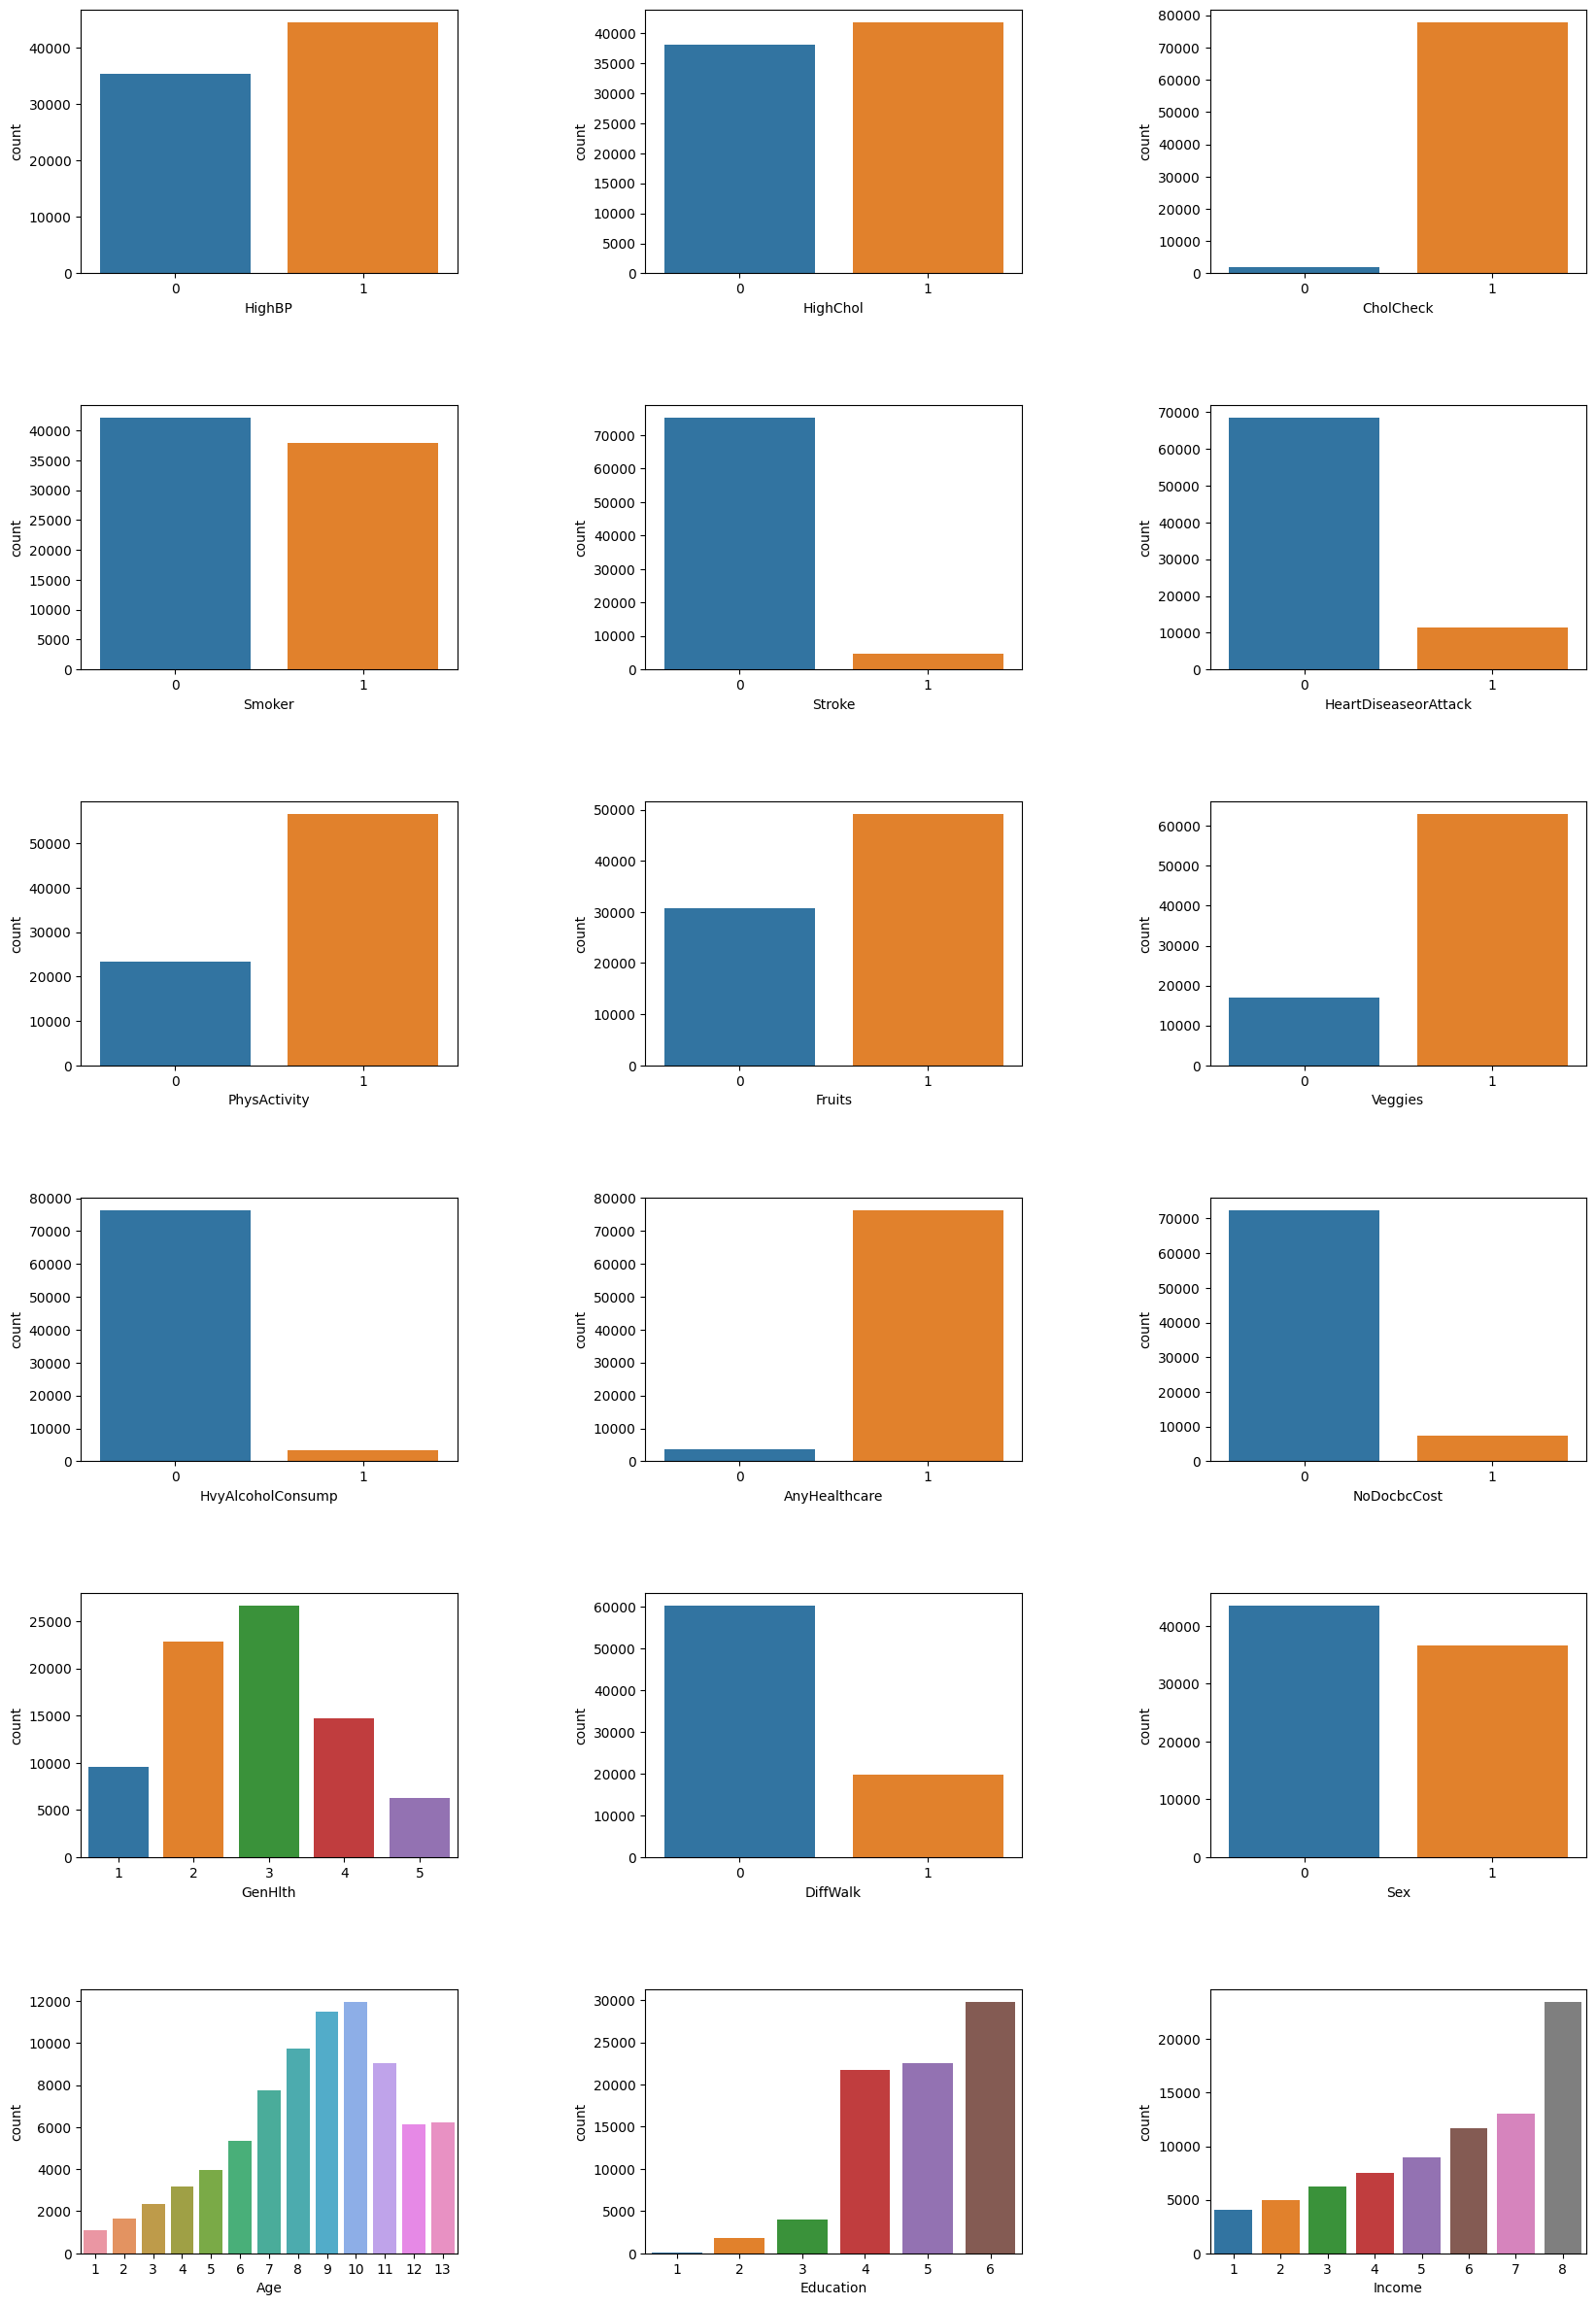

In [58]:
fig, ax = plt.subplots(6, 3, figsize=(20, 30))
axe = ax.ravel()

# plot columns using for loop
i = 0
for col in balanced_df.columns:

    # include only the features discussed in this section
    if col not in ["Diabetes_012", "BMI", "MentHlth", "PhysHlth"]:
        sns.countplot(x=balanced_df[col], ax=axe[i])
        i += 1

# control the spacing
plt.subplots_adjust(
    wspace=0.5, 
    hspace=0.5
)

For "BMI", "MentHlth", and "PhysHlth", the distribution are also similar to before downsampling.

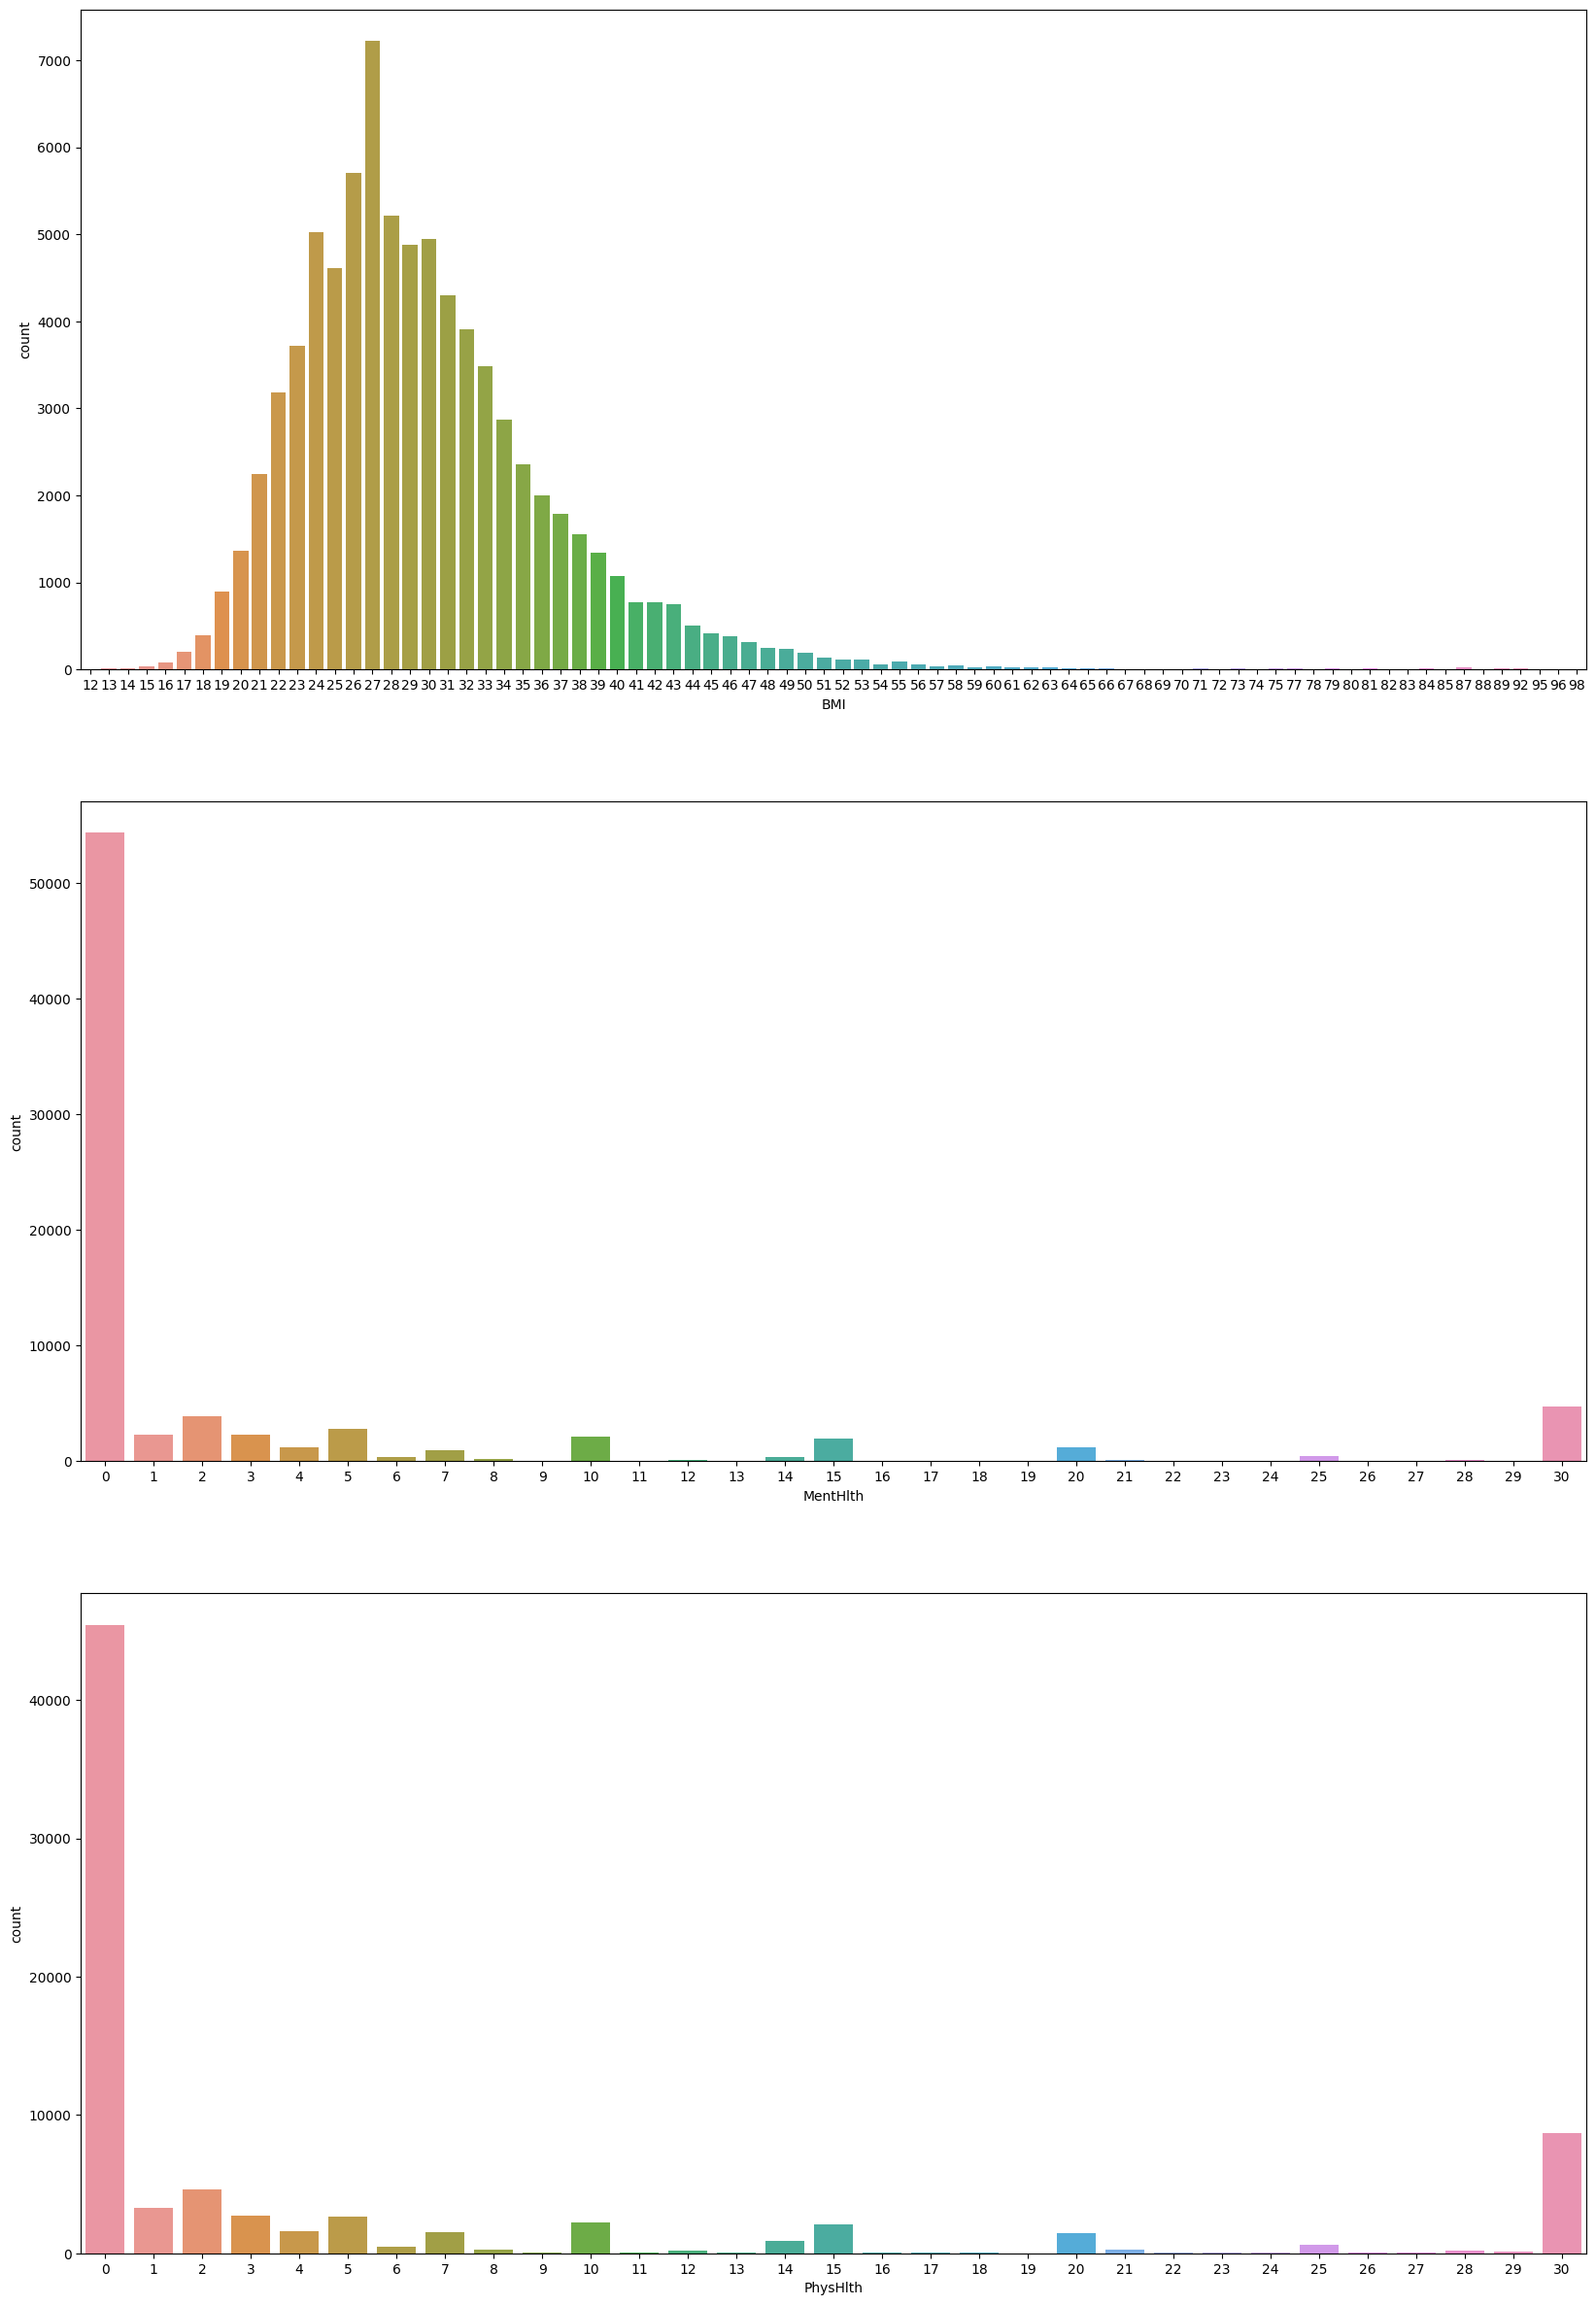

In [61]:
fig, ax = plt.subplots(3, 1, figsize=(20, 30))
axe = ax.ravel()

# plot columns using for loop
i = 0
for col in ["BMI", "MentHlth", "PhysHlth"]:

    # include only the features discussed in this section
    sns.countplot(x=balanced_df[col], ax=axe[i])
    i += 1

# control the spacing
plt.subplots_adjust(
    wspace=0.5
)

<h4>Define target and features</h4>

In [15]:
fea = balanced_df.drop(columns="Diabetes_012")
tar = balanced_df["Diabetes_012"]

In [16]:
# Result check
fea.sample(5, random_state=73)

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
49348,1,0,1,20,1,0,0,1,1,1,0,1,0,4,0,30,0,0,10,6,8
116391,0,1,1,25,0,0,0,1,1,0,0,1,0,3,0,2,0,1,9,6,8
178421,0,0,1,28,0,0,0,1,0,1,0,1,0,2,0,8,0,0,12,6,8
35698,1,1,1,24,1,0,0,1,1,1,0,1,0,2,0,0,0,0,9,6,6
65400,1,1,1,30,1,0,0,1,0,1,0,1,0,3,0,3,0,1,10,5,8


In [17]:
# Result check
tar.sample(5, random_state=73)

49348     0
116391    1
178421    0
35698     0
65400     0
Name: Diabetes_012, dtype: int32

---
# Task 5 – A First Impression

---
# Train-test split is applied twice in this section.

First split - splitting the original data set:  
Training set for experiments in further section  
Testing set for the evaluation on the final model performance

Second split - splitting the training set:  
Training set for experiments in further section  
Testing set (validation set) for the evaluation on the model performance in experiments (NOT the final model)

In [18]:
# first split
X_train, X_test, y_train, y_test = train_test_split(fea, tar, test_size=0.3, shuffle=True, random_state=73)

# check shapes of split
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(55967, 21)
(23987, 21)
(55967,)
(23987,)


In [19]:
# second split
X_train_train, X_train_valid, y_train_train, y_train_valid = train_test_split(X_train, y_train, test_size=0.3, shuffle=True, random_state=73)

# check shapes of split
print(X_train_train.shape)
print(X_train_valid.shape)
print(y_train_train.shape)
print(y_train_valid.shape)

(39176, 21)
(16791, 21)
(39176,)
(16791,)


# Random Baseline for guessing correct class - Dummy Classifier

Observations:

This random guessing baseline shows accuracy score 50% on training set and 49.87% on validation set.

Precision score, 50%, recall score, 100%, and f1 score 67% imply that the model classify all the instances as positive (class 1) and NO negative (class 0). Therefore no false negative value in the classification. This result indicate that, in the further scetion, f1 score would be the target optimization metric, even though we focus on recall score. 

In [20]:
# define the dummy classifier 
# fit training set to the classifier
# track the accuracy scores on training set and validation set

# define and fit 
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train_train, y_train_train)

# track the accuracy scores on training set and validation set
print(f'Training set accuracy score: {dummy_clf.score(X_train_train, y_train_train) }')
print(f'Validation set accuracy score: {dummy_clf.score(X_train_valid, y_train_valid) }')

Training set accuracy score: 0.5009444557892587
Validation set accuracy score: 0.4987195521410279


In [21]:
# Performance on training set
print(classification_report(y_train_train, dummy_clf.predict(X_train_train), zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     19551
           1       0.50      1.00      0.67     19625

    accuracy                           0.50     39176
   macro avg       0.25      0.50      0.33     39176
weighted avg       0.25      0.50      0.33     39176



In [22]:
# Performance on validation set
print(classification_report(y_train_valid, dummy_clf.predict(X_train_valid), zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      8417
           1       0.50      1.00      0.67      8374

    accuracy                           0.50     16791
   macro avg       0.25      0.50      0.33     16791
weighted avg       0.25      0.50      0.33     16791



# Decision Tree Classification with default parameters in sklearn

Some of the default parameters are:  
criterion = 'gini',  
max_depth = None,  
min_samples_split = 2,  
ccp_alpha = 0.0  

<h4>Observations:  </h4>

The result shows overfitting that the accuracy score on training set is 99% but that on validation set is much lower, 64%.  
To have a full picture of the model performance, detail classification reports are presented. Overfitting is reflected on f1 and recall scores as well.

In [23]:
# define the decision tree classifier 
# fit training set to the classifier
# track the accuracy scores on training set and validation set

# define and fit 
dtc = DecisionTreeClassifier()
dtc.fit(X_train_train, y_train_train) 

# track the accuracy scores on training set and validation set
print(f'Training set accuracy score: {dtc.score(X_train_train, y_train_train) }')
print(f'Validation set accuracy score: {dtc.score(X_train_valid, y_train_valid) }')

Training set accuracy score: 0.9959158668572595
Validation set accuracy score: 0.641712822345304


In [24]:
# Performance on training set
print(classification_report(y_train_train, dtc.predict(X_train_train)))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     19551
           1       1.00      0.99      1.00     19625

    accuracy                           1.00     39176
   macro avg       1.00      1.00      1.00     39176
weighted avg       1.00      1.00      1.00     39176



In [25]:
# Performance on validation set
print(classification_report(y_train_valid, dtc.predict(X_train_valid)))

              precision    recall  f1-score   support

           0       0.64      0.66      0.65      8417
           1       0.65      0.63      0.64      8374

    accuracy                           0.64     16791
   macro avg       0.64      0.64      0.64     16791
weighted avg       0.64      0.64      0.64     16791



F1 score on training set is rounded up to 100% but that of validation set is 64%.  
Recall score has the similar result, which is 99% on training and 63% on validation set.

# Scaling

Min-Max Scaling is applied to data.  
Effect of scaling on the performance of decision tree is trivial, so no scaling is applied on the above section.    
However, the following sections consist of models, which are sensitive to the effect on scaling.  
Therefore, scaling is applied from here. (For simiplicity and consistency, decision tree model below will use the same scaled data.)

In [26]:
# Sacling
# Output fitted data is using the same data name as input data

X_scaler = MinMaxScaler()
X_train_train = X_scaler.fit_transform(X_train_train)
X_train_valid = X_scaler.transform(X_train_valid)

---
# Task 6 - Algorithms and their Parameters

In [27]:
# Function to plot the results in further sections

def plot_score(title, x_label):

    """
    Input: Title of the figure and label on x axis
    Output: 3 figures for metrics and training and validation result comparison
    Blue curve: training curve
    Red curve: validation curve

    Lists of training scores and validation scores of the model with different hyperparameter values, are gathered to two separated lists.
    The same metric score is presented in one figure with both training and validation result.
    Different metric scores are displayed in different figures
    """

    # Gather the results of different metrics on the classifier performance
    # Define the name of each metric on the figures
    li_train_score = [train_acc_score, train_f1_score, train_recall_score]
    li_valid_score = [valid_acc_score, valid_f1_score, valid_recall_score]
    label_name = ['accuracy score', 'f1 score', 'recall score']

    # subplots
    fig, ax = plt.subplots(1, 3, figsize=(40, 10))
    axe = ax.ravel()

    # loop through the lists and plot the 3 figures with corresponding data
    for i, scores in enumerate(zip(li_train_score, li_valid_score)):

        axe[i].plot(li_para, scores[0], c='blue')
        axe[i].plot(li_para, scores[1], c='red')
        axe[i].set_title('Influence of ' + title + ' on ' + label_name[i])
        axe[i].set_xlabel(x_label)
        axe[i].set_ylabel(label_name[i])

---
# Decision Tree - Parameter Influence and Handling Overfitting

<h4>1. Decision Tree - Effect of maximum depth</h4>

In [28]:
# Define the hyperparameters for the experiment (Maximum depth of the decision tree)
# Create empty lists to store the results on different metrics and different sets
# Fit model with the defined hyperparameters by using for loop
# Predict classes 
# Store the results

# Test the effect of maximum depth of the decision tree
# Tree depth from 1 to 30
li_para = [*range(1, 30)]

# Create Empty List for result storage
train_acc_score, valid_acc_score = [], []
train_f1_score, valid_f1_score = [], []
train_recall_score, valid_recall_score = [], []

# Fit in different value of maximum tree depth
for n in li_para:

    # define classifier and fit training set
    clf = DecisionTreeClassifier(max_depth=n)
    clf.fit(X_train_train, y_train_train)
    
    # predict classes on training and validation sets
    y_pred_train_train = clf.predict(X_train_train)
    y_pred_train_valid = clf.predict(X_train_valid)

    # store results of 3 metrics on corresponding lists
    train_acc_score.append(accuracy_score(y_train_train, y_pred_train_train))
    valid_acc_score.append(accuracy_score(y_train_valid, y_pred_train_valid))
    train_f1_score.append(f1_score(y_train_train, y_pred_train_train))
    valid_f1_score.append(f1_score(y_train_valid, y_pred_train_valid))
    train_recall_score.append(recall_score(y_train_train, y_pred_train_train))
    valid_recall_score.append(recall_score(y_train_valid, y_pred_train_valid))


<h4>Result Obervation - Overfitting when maximum depth increases:</h4>

For maximum depth from 1 to around 8, the performance of the model is not stable. But both training and validation set in three metrics move in the same direction.  
Accuracy scores for both training and validation sets increase (except on maximum depth equals between 6 and 7, the validation score decreases around 0.01 unit)  
F1 score drop from slightly above 71% to 65%, when maximum depth from 0 to 1, then increase. 
Recall score is fluctuate, which drops and raise and drop and raise. 

However, for maximum depth from 8 to 30, the training scores and validation scores on all three metrics move in the different direction, where the former increases, the latter decreases.  
And the differences increase when the maximum depth increases. The performance is relatively stable after maximum depth reaches 27.

It is clear that overfitting begins at around maximum depth equals to around 8 to 9.


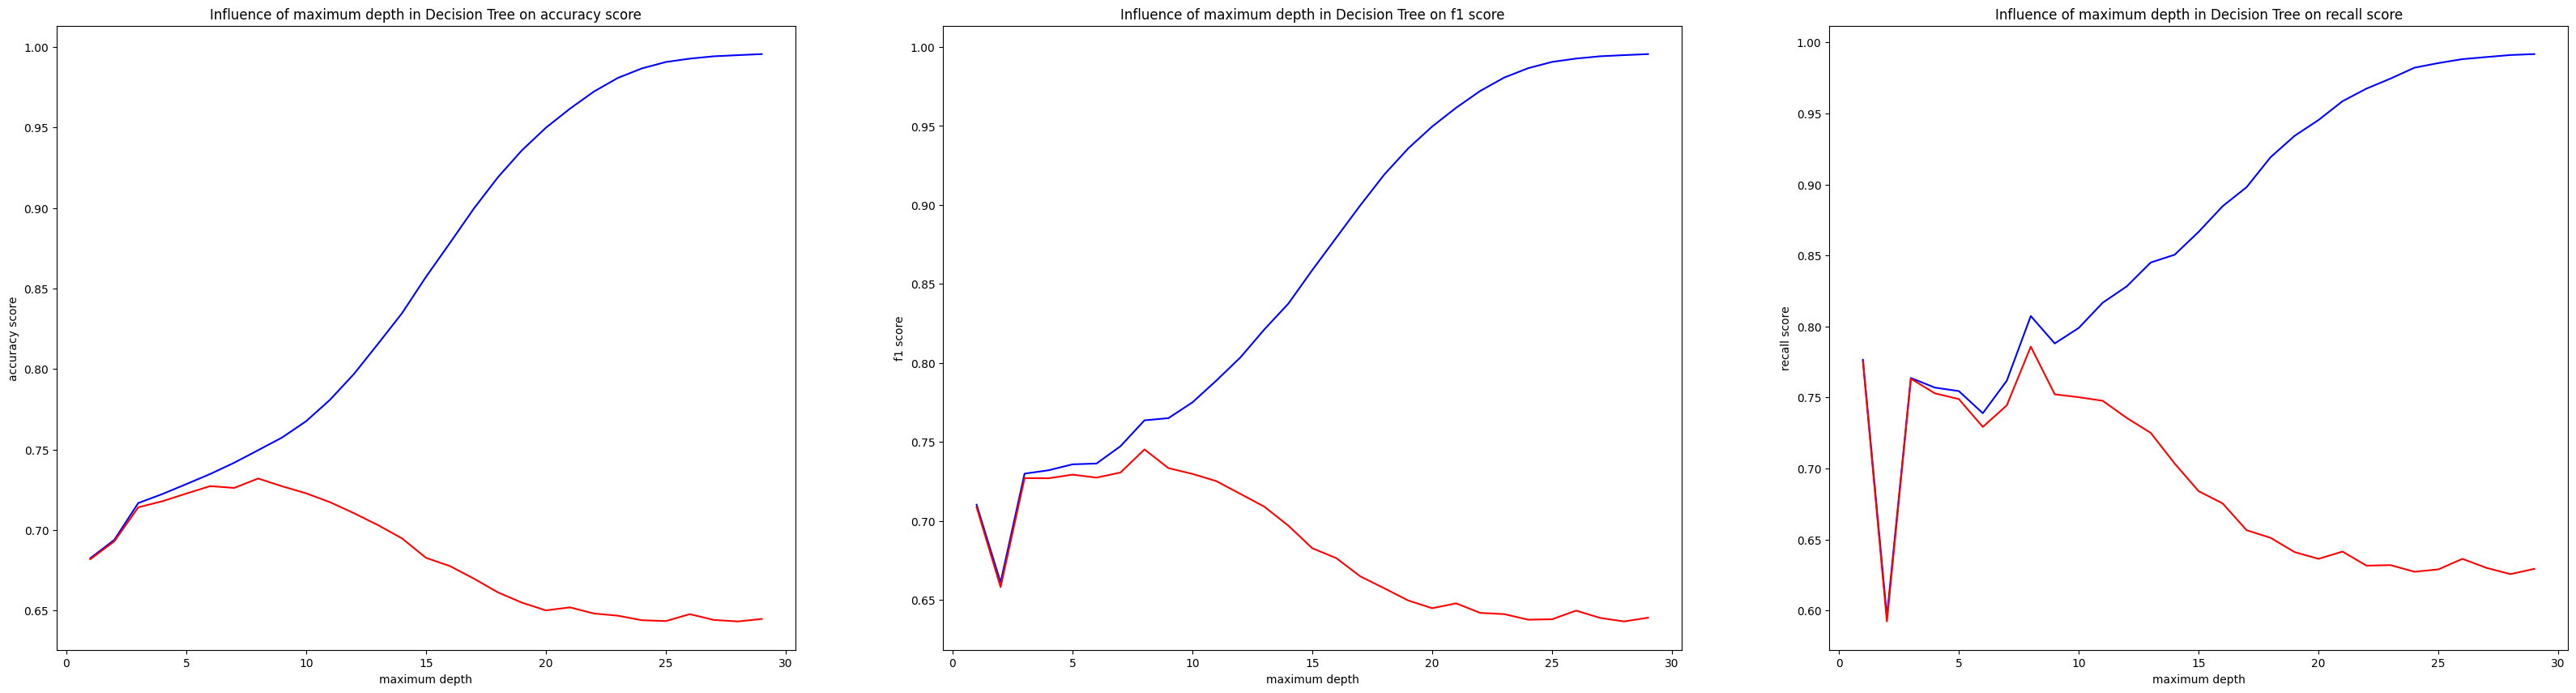

In [29]:
plot_score("maximum depth in Decision Tree", 'maximum depth')

<h4>2. Decision Tree - Effect of Cost Complexity Pruning Parameter</h4>

In [30]:
# Define the hyperparameters for the experiment (Cost-Complexity Pruning Parameter of the decision tree)
# Create empty lists to store the results on different metrics and different sets
# Fit model with the defined hyperparameters by using for loop
# Predict classes 
# Store the results

# Test the effect of cost-complexity pruning parameter of the decision tree
# Tree depth from 1 to 30
li_para = [x/1000 for x in range(0, 15)]

# Create Empty List for result storage
train_acc_score, valid_acc_score = [], []
train_f1_score, valid_f1_score = [], []
train_recall_score, valid_recall_score = [], []

# Fit in different value of maximum tree depth
for n in li_para:

    # define classifier and fit training set
    clf = DecisionTreeClassifier(ccp_alpha=n)
    clf.fit(X_train_train, y_train_train)
    
    # predict classes on training and validation sets
    y_pred_train_train = clf.predict(X_train_train)
    y_pred_train_valid = clf.predict(X_train_valid)

    # store results of 3 metrics on corresponding lists
    train_acc_score.append(accuracy_score(y_train_train, y_pred_train_train))
    valid_acc_score.append(accuracy_score(y_train_valid, y_pred_train_valid))
    train_f1_score.append(f1_score(y_train_train, y_pred_train_train))
    valid_f1_score.append(f1_score(y_train_valid, y_pred_train_valid))
    train_recall_score.append(recall_score(y_train_train, y_pred_train_train))
    valid_recall_score.append(recall_score(y_train_valid, y_pred_train_valid))


<h4>Result Observation - Efficient parameter to handle overfitting</h4>

Cost-complexity pruning score minimixe the difference between the training and validation scores in all three metrics. It works immediately ccp_alpha increases from 0 to 0.001.  
The accuracy scores stay together afterwards, where, in f1 scores and recall scores have a little difference between training and validation set individually.

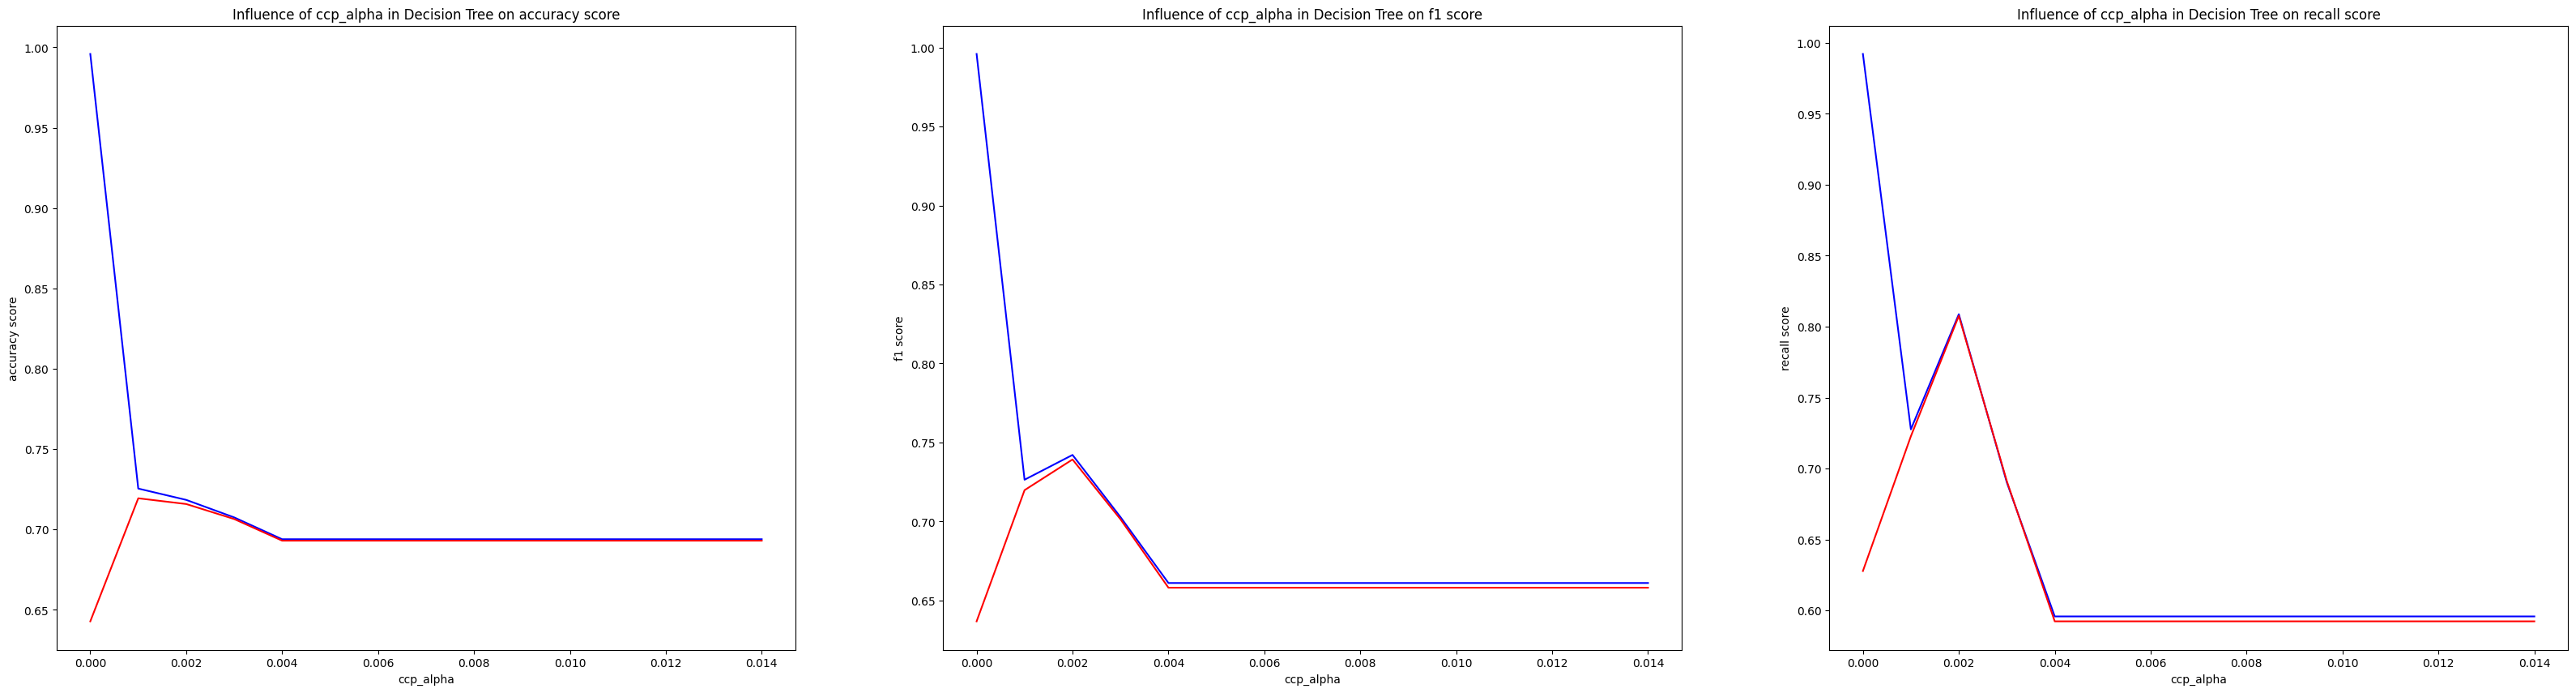

In [31]:
plot_score("ccp_alpha in Decision Tree", 'ccp_alpha')


<h4>Solutions against Overfitting</h4>

From the above analysis on two parameters, maximum depth and cost-complexity pruning parameter (ccp_alpha), we can conclude that both two ways could be the solution of overfitting.

By controlling the maximum depth, smaller value leads to less overfitting. In the example above, 8 would be a reasonable value to deal with overfitting.  
"ccp_alpha" even more efficiently handles the overfitting problem. In this case, with ccp_alpha value around 0.002, problem of overfitting is completely eliminated. 

---
# KNN - Parameter Influence

<h4>KNN - Effect of number of nearest neighbour</h4>

In [32]:
# Define the hyperparameters for the experiment (Number of nearest neighbour)
# Create empty lists to store the results on different metrics and different sets
# Fit model with the defined hyperparameters by using for loop
# Predict classes 
# Store the results

# Test the effect of Number of nearest neighbour on KNN
# Number of nearest neighbour from 1 to 30
li_para = [*range(1, 30)]

# Create Empty List for result storage
train_acc_score, valid_acc_score = [], []
train_f1_score, valid_f1_score = [], []
train_recall_score, valid_recall_score = [], []

# Fit in different value of number of nearest neighbour
for n in li_para:
    
    # define classifier and fit training set
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(X_train_train, y_train_train)
    
    # predict classes on training and validation sets
    y_pred_train_train = clf.predict(X_train_train)
    y_pred_train_valid = clf.predict(X_train_valid)

    # store results of 3 metrics on corresponding lists
    train_acc_score.append(accuracy_score(y_train_train, y_pred_train_train))
    valid_acc_score.append(accuracy_score(y_train_valid, y_pred_train_valid))
    train_f1_score.append(f1_score(y_train_train, y_pred_train_train))
    valid_f1_score.append(f1_score(y_train_valid, y_pred_train_valid))
    train_recall_score.append(recall_score(y_train_train, y_pred_train_train))
    valid_recall_score.append(recall_score(y_train_valid, y_pred_train_valid))


<h4>Result Observation:</h4>

The performance of KNN is similar to that of decision tree. The best validation accuracy score in these two models are slightly above 70%.  
Yet, the recall score has never reached over 80% as in decision tree.

Overall in all three metrics, both training and validation scores move towards the same direction but, due to the different magnitude, overfitting is handled.  
Differeence between training and validation scores decrease, when number of nearest neighbour increase.

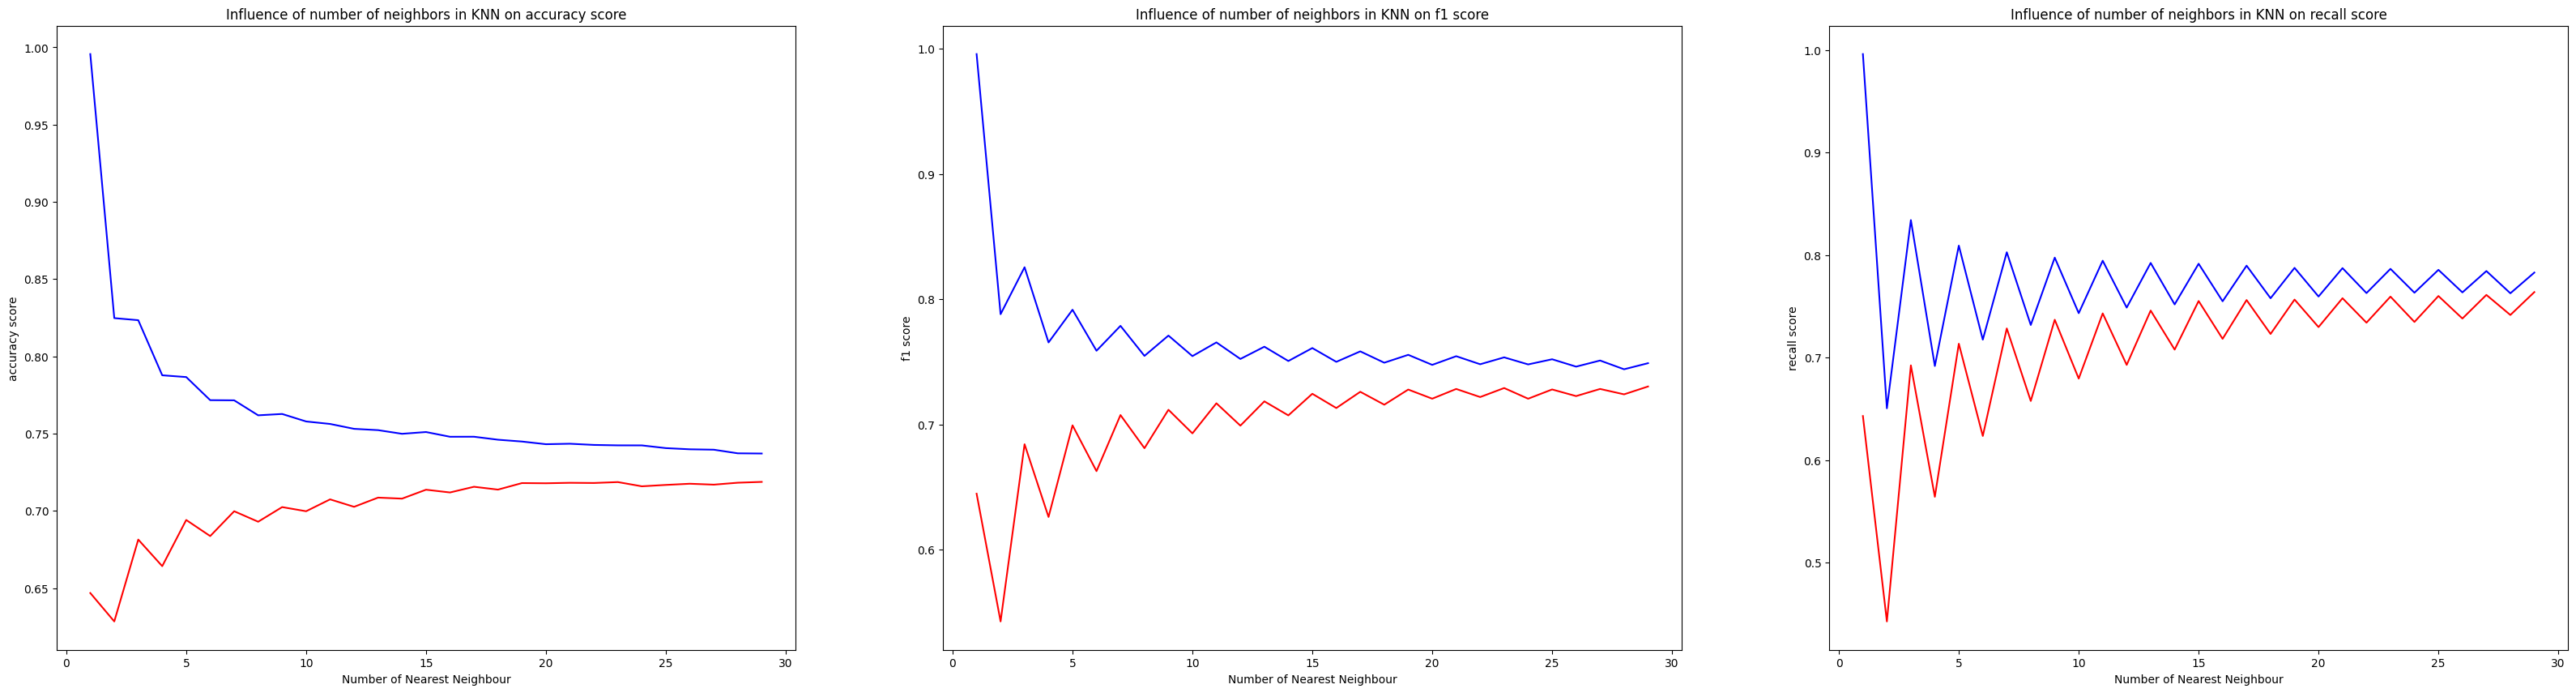

In [33]:
plot_score("number of neighbors in KNN", "Number of Nearest Neighbour")

---
# Support Vector Machine - Parameter Influence

<h4>SVM - Effect of C</h4>

In [34]:
# Define the hyperparameters for the experiment (C)
# Create empty lists to store the results on different metrics and different sets
# Fit model with the defined hyperparameters by using for loop
# Predict classes 
# Store the results

# Test the effect of C on SVM
# Number of nearest neighbour from 1 to 10
li_para = [*range(1, 10)]
    
# Create Empty List for result storage
train_acc_score, valid_acc_score = [], []
train_f1_score, valid_f1_score = [], []
train_recall_score, valid_recall_score = [], []

# Fit in different value of C
for n in li_para:

    # define classifier and fit training set
    clf = SVC(C=n)
    clf.fit(X_train_train, y_train_train)
    
    # predict classes on training and validation sets
    y_pred_train_train = clf.predict(X_train_train)
    y_pred_train_valid = clf.predict(X_train_valid)

    # store results of 3 metrics on corresponding lists
    train_acc_score.append(accuracy_score(y_train_train, y_pred_train_train))
    valid_acc_score.append(accuracy_score(y_train_valid, y_pred_train_valid))
    train_f1_score.append(f1_score(y_train_train, y_pred_train_train))
    valid_f1_score.append(f1_score(y_train_valid, y_pred_train_valid))
    train_recall_score.append(recall_score(y_train_train, y_pred_train_train))
    valid_recall_score.append(recall_score(y_train_valid, y_pred_train_valid))

<h4>Result Observation:  </h4>

Among all three models, the performance of SVM is the best that the scores in all three metrics are the highest.

Training and validation scores in all three metrics move to different direction. Along with C increase, training scores are rising but validation scores are diminishing.  
In other words, the level of overfitting rises, when C increase.



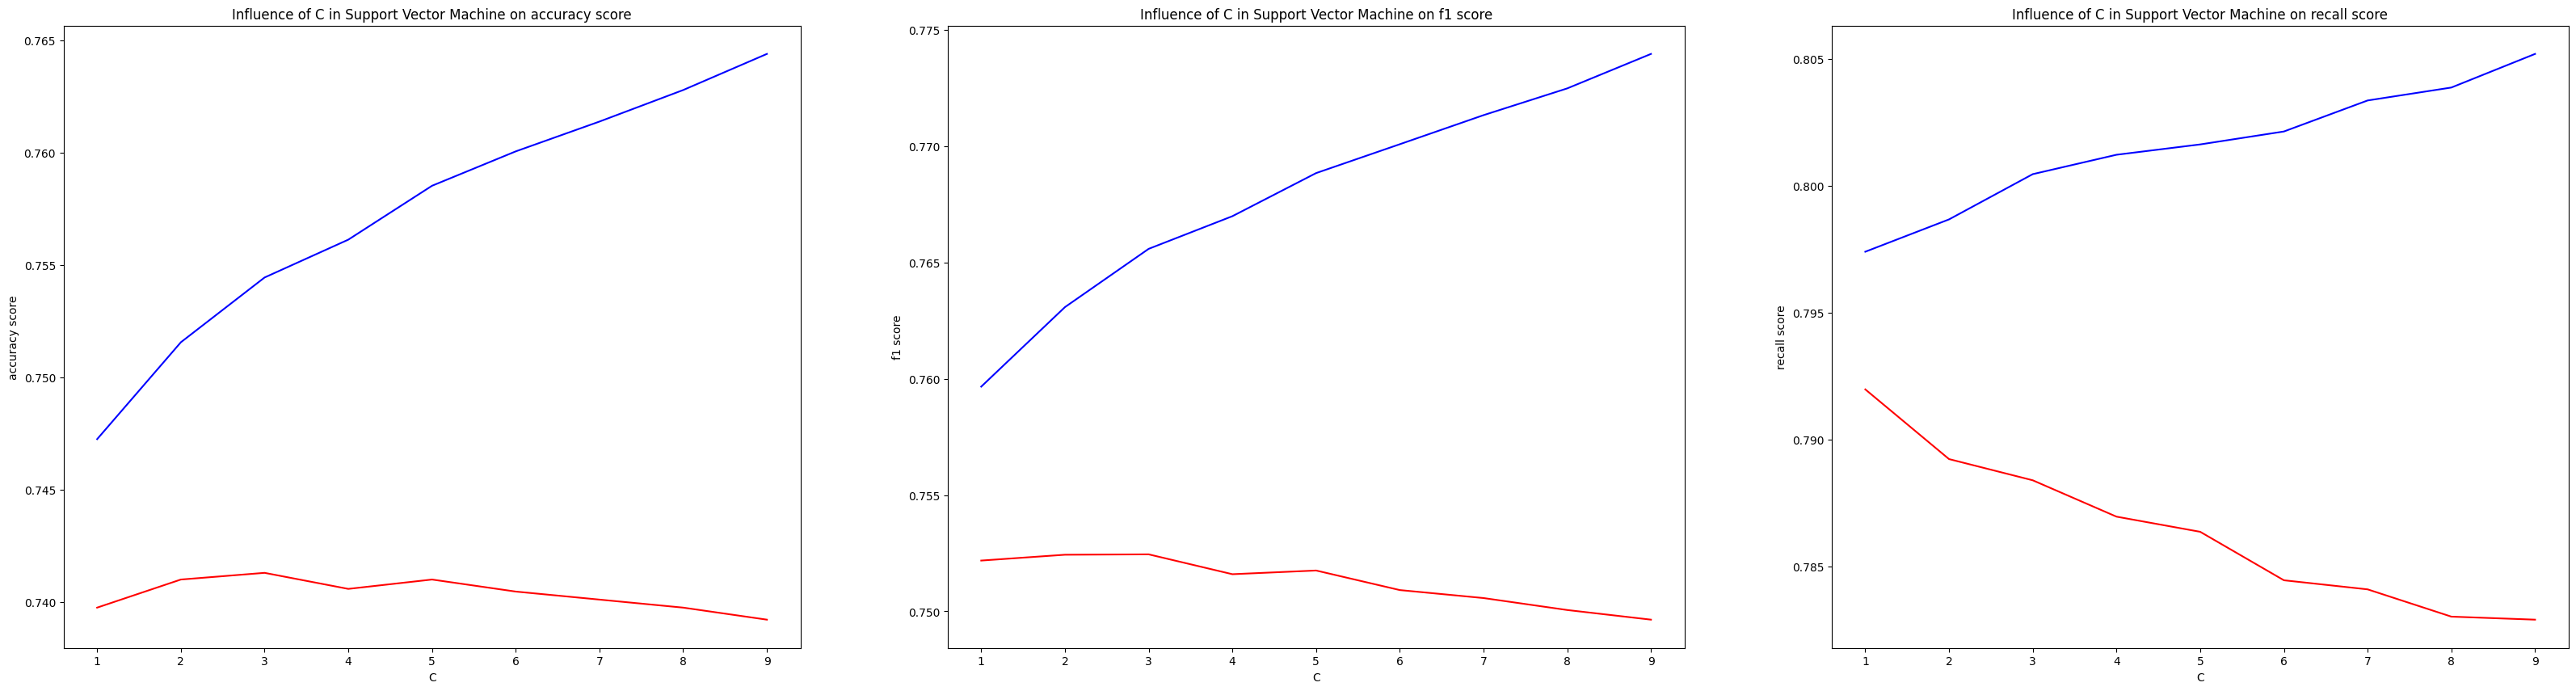

In [35]:
plot_score("C in Support Vector Machine", "C")

---
<h4>Grids of hyperparameters</h4>

Based on the observations in the analysis above of the three models, grids of hyperparameters are prepared for the further sections.  
In addition, series of hyperparameters, which did not test in previous section, are included as well, in order to searching the best combinations of hyperparameters for the models.  

Decision tree and KNN have one grid for each, where SVM has two grid.  
It is because one of the critical parameter is "degree", which only affects the "poly" kernel is used.  
If "rbf" and "poly" are put in the same grid, same performance would be result for combination of "rbf" with different "degree", which leads to redundancy.  
Therefore, "rbf" kernel and "poly" kernel are put in two indepenent grids.

In [36]:
# parameter grids for decision tree
para_dtc = dict(
    estimator__criterion=['gini', 'entropy', 'log_loss'],
    estimator__splitter=['best', 'random'],
    estimator__max_depth=[*range(1, 10)],
    estimator__min_samples_split=[*range(10, 20, 10)],
    estimator__min_samples_leaf=[*range(10, 20, 10)],
    estimator__ccp_alpha=[a/1000 for a in [*range(0, 15)]]
)

# parameter grids for KNN
para_knc = dict(
    estimator__n_neighbors=[*range(1,15)],
    estimator__weights=['uniform', 'distance'],
    estimator__p=[*range(1, 4)]
)

# parameter grids for SVM with "rbf" kernel
para_svc_rbf = dict(
    estimator__kernel=['rbf'],
    estimator__gamma=['scale', 'auto'],
    estimator__C = [1, 2, 3, 4, 5]
)

# parameter grids for SVM with "poly" kernel
para_svc_poly = dict(
    estimator__kernel=['poly'],
    estimator__degree=[*range(1, 4)],
    estimator__gamma=['scale', 'auto'],
    estimator__C = [1, 2, 3, 4, 5]
)

---
# Task 7 – Nested Cross Validation

This function is set as an estimator to be fitted into nested cross validation in further section.  
"Training sets" in cross validation has to be fitted to scaler before the applying the scaler to the "testing set" in cross validation.  
Without this pipeline, scaling in the search cross validaion would lead to data leakage. 

In [37]:
def get_pipe(estimator):

  """
  Data passed to this pipeline would be scaled by MinMaxScaler and then fitted to the input classifier next. 
  """
  return Pipeline([('scaler', MinMaxScaler()), ('estimator', estimator)])

Due to the limitation of computation, random search cv is performed in this section, instead of grid search cv.

In [38]:
def nested_cv(clf, para_grid, num_trials=5, num_repeats=10, search_num_split=10, cv_num_split=10):

    """
    Input: 
    1. clf = classifier
    2. para_grid = corresponding grid of hyperparameters
    3. num_trials = number of trials for outer cv
    4. num_repeats = number of repeats for folds in outer cv
    5. search_num_split = number of splits in inner search cv
    6. cv_num_split = number of split for outer cv

    Output:
    Means and standard deviations of
    1. fit time
    2. score time
    3. accuracy score
    4. f1 score
    5. recall score
    
    Folding strategies are:
    Inner cv = StratifiedKFold 
    Outer cv = RepeatedStratifiedKFold

    Search Model = Random Search cv (To save computing resources) but return reasonable robust results at the same time
    Number of iteration in the search model (Number of random parameter samples) = 10

    F1 score is chosen to be the refit metrics in search cv
    Although recall score is the most important score, the model might be trained to classify all the input as positive to avoid any false negative. 
    (High Recall scores but lower precision score)

    Process:
    Classifier is fitted to pipeline function, "get_pipe"
    """

    # fit classifier to pipeline function defined previously
    pipe = get_pipe(clf)

    # prepare empty lists to store the results
    fit_time, score_time = [], []
    test_score_acc, test_score_f1, test_score_recall = [], [], []

    # apply for loop to run the whole nested cv
    for i in range(num_trials):
        
        # Fold method for inner cv
        skf = StratifiedKFold(
            n_splits=search_num_split, 
            shuffle=True, 
            random_state=73+i
        )

        # Fold method of outer cv
        rskf = RepeatedStratifiedKFold(
            n_splits=cv_num_split, 
            n_repeats=num_repeats, 
            random_state=73+i
        )

        # fit pipeline to search cv
        # fit the corresponding parameter grids to the classifier
        # use StratifiedKFold be splitting strategy
        # use f1 as refit score to search the best hyperparameter combinations
        search_cv = RandomizedSearchCV(
            estimator=pipe,
            param_distributions=para_grid,
            cv=skf,
            scoring="f1",
            refit="f1",
            random_state=73+i
        )

        # fit X_train and y_train data to cv
        # X_train is not scaled here, but is scaled when passes through pipeline inside random search cv
        # track 3 metrics
        cv = cross_validate(
            estimator=search_cv, 
            X=X_train,
            y=y_train,
            cv=rskf,
            scoring=["accuracy", "f1", "recall"]
        )

        # Store results to the corresponding lists prepared
        fit_time.append(cv['fit_time'])
        score_time.append(cv['score_time'])
        test_score_acc.append(cv['test_accuracy'])
        test_score_f1.append(cv['test_f1'])
        test_score_recall.append(cv['test_recall'])

    
    # Store mean fit and score time
    mean_fit_time = np.mean(np.array(fit_time).flatten())
    mean_score_time = np.mean(np.array(fit_time).flatten())
    
    # Store mean and standard deviation of accuracy score
    mean_test_score_acc = np.mean(np.array(test_score_acc).flatten())
    std_test_score_acc = np.std(np.array(test_score_acc).flatten())
    
    # Store mean and standard deviation of f1 score
    mean_test_score_f1 = np.mean(np.array(test_score_f1).flatten())
    std_test_score_f1 = np.std(np.array(test_score_f1).flatten())

    # Store mean and standard deviation of recall score
    mean_test_score_recall = np.mean(np.array(test_score_recall).flatten())
    std_test_score_recall = np.std(np.array(test_score_recall).flatten())

    # return all the results stored
    return [mean_fit_time, mean_score_time, mean_test_score_acc, std_test_score_acc, mean_test_score_f1, std_test_score_f1, mean_test_score_recall, std_test_score_recall]

The following will apply the "nested_cv" function to four classifier models, decision tree, K-nearest neighbour, SVM with "rbf" kernel, and SVM with "poly" kernel.  
Number of trials, number of repeats, and number of splits on outer cv, and number of splits on inner cv are chosen at the minumum value, due to the limitation in computation capacity of the machine.  

In this section, all nested corss validation experiments share the same  
1. number of trials for whole cv = 1
2. number of repeats in outer cv = 3
3. number of split in inner search cv = 4
4. number of split in outer cv = 2

It is noticed that larger values of these numbers would produce more robust result. The current outcomes presented below are stable results obtained after conducting experiments, with the trade-off of time-consuming running processes.

In [39]:
# Create an empty dictionary to store the results in further sections
compare_clf = {}

In [40]:
# fit Decision Tree to nested cross validation function
# store results to the dictionary

dtc_report = nested_cv(
    
    clf=DecisionTreeClassifier(), 
    para_grid=para_dtc, 
    num_trials=1, 
    num_repeats=3,
    search_num_split=4,
    cv_num_split=2
    
)

# store results to the dictionary
compare_clf['dtc'] = [*dtc_report]

In [64]:
# fit KNN to nested cross validation function
# store results to the dictionary

knc_report = nested_cv(
    
    clf=KNeighborsClassifier(), 
    para_grid=para_knc,
    num_trials=1, 
    num_repeats=3,
    search_num_split=4,
    cv_num_split=2
    
)

# store results to the dictionary
compare_clf['knc'] = [*knc_report]

In [65]:
# fit SVM with "rbf" kernel to nested cross validation function
# store results to the dictionary

svc_report_rbf = nested_cv(

    clf=SVC(),
    para_grid=para_svc_rbf, 
    num_trials=1,
    num_repeats=3,
    search_num_split=4,
    cv_num_split=2

)

# store results to the dictionary
compare_clf['svc_rbf'] = [*svc_report_rbf]

In [66]:
# fit SVM with "poly" kernel to nested cross validation function
# store results to the dictionary

svc_report_poly = nested_cv(

    clf=SVC(), 
    para_grid=para_svc_poly, 
    num_trials=1,
    num_repeats=3,
    search_num_split=4,
    cv_num_split=2
    
)

# store results to the dictionary
compare_clf['svc_poly'] = [*svc_report_poly]

In [67]:
# Put the results in dataframe
# reset the column names

df_compare_clf = pd.DataFrame.from_dict(compare_clf).T
df_compare_clf.columns = ['mean_fit_time', 'mean_score_time', 'mean_test_score_acc',  'std_test_score_acc', 'mean_test_score_f1', 'std_test_score_f1', 'mean_test_score_recall', 'std_test_score_recall']
df_compare_clf

,mean_fit_time,mean_score_time,mean_test_score_acc,std_test_score_acc,mean_test_score_f1,std_test_score_f1,mean_test_score_recall,std_test_score_recall
dtc,1.298221,1.298221,0.723385,0.009165,0.735641,0.007280,0.769969,0.035054
knc,99.342462,99.342462,0.692194,0.001650,0.699165,0.002511,0.715002,0.005655
svc_rbf,723.392656,723.392656,0.741330,0.002205,0.757507,0.001939,0.807600,0.004049
svc_poly,482.397941,482.397941,0.742277,0.003030,0.758100,0.002642,0.807243,0.004833


# Comparison between models

By comparing the running time of four models, decision tree (dtc) is the fastest, which takes 1.3 units of time to fit, followed by KNN (knc) 99.3 units of time and support vector machine is the slowet that with "rbf" kernel (svc_rbf) takes over 700 units of time to fit and with the "poly" kernel takes less time, less than 500 units of time. 

On the other hand, SVM returns the best scores, in all three metrics, testing mean in accuracy, f1 and recall scores. The difference is small at around 0.1% but svc_poly performs better in accuracy score and f1 score than svc_rbf. Yet, the latter is 0.01% better in mean testing recall score. KNN performance is the worst, which return mean accuracy and f1 score below 70%. Decision Tree has closer performance with SVM but that is still 2 - 3% below that in SVM among all scores. 

# Comparison with baseline - Dummy Classifier

Random baseline suggests around 50% accuracy score but problem arises in recall score that the classifier assigned the same class label (class 1) to all instances, and there were no instances incorrectly classified as negative (false negatives).

All the 4 models perform better than the random baseline model in score metrics. Although the random baseline was the fastest classifier, the results of the accuracy score and recall score shows that this model should not be considered.

# Comparison with baseline - Decision Tree Classifier (Default setting)

The performance of the decision tree with deault setting in sklearn was around 64% accuracy and f1 score and 63% recall score.  

All four models returns higher metric scores than this baseline.

# Recommendation

After all Support Vector Machine (SVM) performance is the best in accuracy score, f1 score, and recall score. Even though the model required number of times more computing time than the other models, SVM would be the preferred model for the final production. 

Among the two kernels, "rbf" and "poly", the latter would be selected because the running time is shorter, given that the differences between scores are not significant. 

---
# Task 8 – Final Production Model



---
# SVM poly - Grid Search CV

Grid search cv is applied to search the best combination among every parameter combinations, instead of random search cv in previous section.

Number of splits and number of repeats are always increased, in order to generate a more robust result. 

In [25]:
# fit the final production model to pipeline
# input data is scaled by MinMaxScaler in each split in CV
pipe = get_pipe(SVC())

# prepare grid of parameters and split numbers
para_grid = para_svc_poly
num_splits = 10
num_repeats = 10

# Fold strategy for outer cv
rskf = RepeatedStratifiedKFold(
    n_splits=num_splits,
    n_repeats=num_repeats, 
    random_state=73
)

# fit pipeline and grid to Grid Search CV
search_cv = GridSearchCV(
    estimator=pipe, 
    param_grid=para_grid,
    return_train_score=True,
    scoring=["accuracy", "f1", "recall"],
    refit='f1',
    cv=rskf,
    n_jobs=4
)

# fit original training set to the search model
search_cv.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('estimator', SVC())]),
             n_jobs=4,
             param_grid={'estimator__C': [1, 2, 3, 4, 5],
                         'estimator__degree': [1, 2, 3],
                         'estimator__gamma': ['scale', 'auto'],
                         'estimator__kernel': ['poly']},
             return_train_score=True)

# The Best hyperparameters

In [26]:
# Checking the combination of parameters, which generated the best result
print(search_cv.best_params_)

{'estimator__C': 4, 'estimator__degree': 2, 'estimator__gamma': 'scale', 'estimator__kernel': 'poly'}


In [27]:
# Store the best model of SVM from the grid search cross validation result
# Using pipeline to fit the model with MinMaxScaling
# Fitting original training set to the model

best_clf = search_cv.best_estimator_
pipe_clf = make_pipeline(MinMaxScaler(), best_clf)
pipe_clf.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('pipeline',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('estimator',
                                  SVC(C=4, degree=2, kernel='poly'))]))])

In [28]:
# result of fitting original training set
print(classification_report(y_train, pipe_clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.79      0.68      0.73     27968
           1       0.72      0.82      0.76     27999

    accuracy                           0.75     55967
   macro avg       0.75      0.75      0.74     55967
weighted avg       0.75      0.75      0.74     55967



# Deploy the model and evaluate the performance with original testing set

In [29]:
# result of fitting original testing set
print(classification_report(y_test, pipe_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      0.67      0.72     12009
           1       0.71      0.81      0.76     11978

    accuracy                           0.74     23987
   macro avg       0.75      0.74      0.74     23987
weighted avg       0.75      0.74      0.74     23987



The over 80% recall score (with a reasonable precision score at the same time) shows that the model is good for identifying diabetes. 

---
# Task 9 - Conclusions and Future Work

In the wake of the collaborative endeavor initiated in 2016 to confront the burgeoning challenge of diabetes, our united team of data scientists and medical professionals at a distinguished health research center in the United States successfully crafted a machine learning solution for early diabetes detection. This proactive mission aimed to predict diabetes risk in its nascent stages, enabling healthcare providers to intervene swiftly and furnish personalized care plans and lifestyle recommendations to those affected.

The experimental results revealed the supremacy of Support Vector Machine (SVM), attaining a remarkable recall score of 81%, an F1 score of 76%, and an accuracy score of 74%. This success underscores the efficiency of our approach in prioritizing the identification of actual diabetes cases, aligning seamlessly with our overarching mission of proactive and accurate diabetes detection.

There are some limitations in this research. Due to the limitation in computing resources, small number of cross validations were conducted that the result is still reliable. However, with a advanced hardware, higher number of cross validations and in search of hyperparameters could give a more robust result. The respondents are mostly middle age, high education and high income group that might limit the generalization of the results. 

In the future, feature importance analysis should be conducted. Correlations between features could lead to significant difference in model performance. Besides, experiments on more other algorithms and other hyperparameters should also be conducted in order to build a more efficient and accurate model. 